In [270]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
pd.set_option('display.max_columns', None)

import arabic_reshaper
from bidi.algorithm import get_display
from ydata_profiling import ProfileReport

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [271]:
#Read in the csv file and convert to a Pandas dataframe

df=pd.read_csv('Data/Jadarat_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [272]:
df.head()

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [273]:
df.shape

(1470, 18)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [274]:
profile = ProfileReport(df, title="Pandas Profiling Report")

#profile

In [275]:
df.describe(include='object')

job_title    job_date  \
count       1470        1470   
unique       324          92   
top         بائع  09/06/1444   
freq          98          47   

                                                 job_desc  \
count                                                1470   
unique                                                438   
top     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
freq                                                   93   

                                                job_tasks  \
count                                                1470   
unique                                                444   
top     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
freq                                                   90   

                                                comp_name   comp_no comp_type  \
count                                                1470      1470      1470   
unique                                                886       894         2   
top     شركه العرض المتقن للخدمات التجارية شركة مساهمة...  1-169123       خاص   
freq                                                   16        16      1465   

          comp_size       eco_activity  \
count          1456               1380   
unique            7                361   
top     صغيرة فئة ب  المطاعم مع الخدمة   
freq            635                 65   

                                          qualif  region          city  \
count                                        780    1470          1470   
unique                                       615      14           114   
top     ['Language data', 'الانجليزية', 'متوسط']  الرياض  AR RIYADH...   
freq                                          28     622           523   

                    benefits   contract positions    exper gender  
count                   1470       1470      1470     1470   1470  
unique                   393          2        25        6      3  
top     ['Salary', '4000.0']  دوام كامل     0 / 1  0 Years   both  
freq                     449       1448       853      833    587

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [276]:
# This dataset it is reliable and it is from Jadarat in Saudi Arabia

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [277]:
# The data was published in 2022-2023, but it's best to use what the business provided since the timeframe isn't considered.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [278]:
# we ahve only one data source and it the columns is consistent with logical meaning for it

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [279]:
# the sample is good for our case 

In [280]:
df.head()

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [281]:
df["job_desc"].duplicated().sum(), df["job_tasks"].duplicated().sum(),df["job_title"].duplicated().sum(),df["job_date"].duplicated().sum()

(1032, 1026, 1146, 1378)

In [282]:
df.shape

(1470, 18)

In [283]:
# maybe we don't need for (job_desc, job_title, job_date, comp_name, job_tasks) columns for our case , but i will keep it for now because will help me to understand the data more

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [284]:
df[df.duplicated(keep=False)]

job_title    job_date                                           job_desc  \
1467     صيدلي  18/06/1444  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1469     صيدلي  18/06/1444  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                comp_name    comp_no comp_type    comp_size  \
1467  شركة تقنية الدواجن والألبان للتجارة  1-2415250       خاص  صغيرة فئة ب   
1469  شركة تقنية الدواجن والألبان للتجارة  1-2415250       خاص  صغيرة فئة ب   

     eco_activity                                             qualif  region  \
1467          NaN  ['Professional certificate \\ License data', '...  الرياض   
1469          NaN  ['Professional certificate \\ License data', '...  الرياض   

              city              benefits   contract positions     job_post_id  \
1467  AR RIYADH...  ['Salary', '7000.0']  دوام كامل     0 / 1  20202026399061   
1469  AR RIYADH...  ['Salary', '7000.0']  دوام كامل     0 / 1  20202026399061   

        exper gender  
1467  0 Years   both  
1469  0 Years   both

In [285]:
df.shape

(1470, 18)

In [286]:
# this will be removed because it is duplicated

In [287]:
df.drop_duplicates(inplace=True)

In [288]:
df.shape

(1469, 18)

In [289]:
df_test = df.copy()
df_test.drop(columns=["job_post_id"], inplace=True)

df_test.duplicated().sum()


7

In [290]:
# if remove the job_post_id column we will have more duplicated rows , i see we need the job_post_id column 

In [291]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [292]:
#Display number missing values per column

In [293]:
df.head()

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [294]:
df.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     89
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [295]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [296]:
# check columns types 

In [297]:
df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [298]:
# go to clean them 

In [299]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [300]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [301]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [302]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [303]:
df.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     89
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [304]:
df.describe(include='object')

job_title    job_date  \
count       1469        1469   
unique       324          92   
top         بائع  09/06/1444   
freq          98          47   

                                                 job_desc  \
count                                                1469   
unique                                                438   
top     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
freq                                                   93   

                                                job_tasks  \
count                                                1469   
unique                                                444   
top     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
freq                                                   90   

                                                comp_name   comp_no comp_type  \
count                                                1469      1469      1469   
unique                                                886       894         2   
top     شركه العرض المتقن للخدمات التجارية شركة مساهمة...  1-169123       خاص   
freq                                                   16        16      1464   

          comp_size       eco_activity  \
count          1455               1380   
unique            7                361   
top     صغيرة فئة ب  المطاعم مع الخدمة   
freq            634                 65   

                                          qualif  region          city  \
count                                        779    1469          1469   
unique                                       615      14           114   
top     ['Language data', 'الانجليزية', 'متوسط']  الرياض  AR RIYADH...   
freq                                          28     621           522   

                    benefits   contract positions    exper gender  
count                   1469       1469      1469     1469   1469  
unique                   393          2        25        6      3  
top     ['Salary', '4000.0']  دوام كامل     0 / 1  0 Years   both  
freq                     449       1447       852      832    586

In [305]:
df[df["comp_size"].isnull()]

job_title    job_date  \
1296           مدير إداري  25/06/1444   
1393    موظف صندوق محاسبة  01/07/1444   
1399    موظف صندوق محاسبة  29/06/1444   
1401           وسيط عقاري  29/06/1444   
1409                محامي  29/06/1444   
1411        أخصائي قانوني  29/06/1444   
1421            مدير مالي  29/06/1444   
1426             مصفف شعر  29/06/1444   
1432    موظف صندوق محاسبة  27/06/1444   
1436    أخصائي علاج طبيعي  26/06/1444   
1438                 بائع  26/06/1444   
1444  مشرف مدخلي البيانات  26/06/1444   
1451        فني مختبر طبي  25/06/1444   
1456                محامي  24/06/1444   

                                               job_desc  \
1296  ['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...   
1393  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1399  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1401  ['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...   
1409  ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   
1411  ['مساعدة العملاء والمنشآت في مختلف المسائل الق...   
1421  ['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...   
1426  ['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...   
1432  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1436  ['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...   
1438  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1444  ['الإشراف على مدخلي البيانات والتأكد من صحة ال...   
1451  ['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...   
1456  ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   

                                              job_tasks  \
1296  ['   المشاركة في تطوير الأهداف الرئيسية للشؤون...   
1393  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1399  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1401  ['   تقييم رغبات العملاء والميزانيات المحددة و...   
1409  ['   استقبال القضية وتحديد نوعها وتحليل عناصره...   
1411  ['   تأهيل الطلبات وتقييم الخيارات القانونية، ...   
1421  ['   المشاركة في تطوير الأهداف الرئيسية للإدار...   
1426  ['   استقبال العميل وإجلاسه على كرسي القص  ووض...   
1432  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1436  ['   دراسة وتحليل برنامج المعالجة الطبيعية الم...   
1438  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1444  ['   تدقيق البيانات بعد إدخالها، والتأكد من صح...   
1451  ['   تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...   
1456  ['   استقبال القضية وتحديد نوعها وتحليل عناصره...   

                                              comp_name     comp_no comp_type  \
1296            مكتب تصميم المشاريع للاستشارات الهندسية   4-1990473       خاص   
1393                            مغاسل نسيم الفل للملابس  15-1963098       خاص   
1399                            مغاسل نسيم الفل للملابس  15-1963098       خاص   
1401                                مؤسسة فانس العقارية   1-2268591       خاص   
1409  شركة الخبراء المتحدون للمحاماة والاستشارات الق...   1-2334348       خاص   
1411  شركة الخبراء المتحدون للمحاماة والاستشارات الق...   1-2334348       خاص   
1421                شركة إرفاء المحدودة (شركة شخص واحد)  17-1989300       خاص   
1426                   صالون تشرين ثاني للتزيين النسائي   1-2593881       خاص   
1432                  مؤسسة التذوق الحلو لتقديم الوجبات   1-2559144       خاص   
1436             مجمع ارجوان سامي بن نائف العتيبي الطبي   2-1949575       خاص   
1438                مؤسسة ريان سعد عواد الدهام للحلويات   4-1971557       خاص   
1444                          خالد عوض الجوهي للمقاولات   1-2073853       خاص   
1451                         مجمع ابتسامة العائلة الطبي   1-2599562       خاص   
1456        شركة فيصل عبد الله الفوزان وشركاؤه للمحاماة   1-2664602       خاص   

     comp_size                          eco_activity  \
1296       NaN                                   NaN   
1393       NaN                                   NaN   
1399       NaN                                   NaN   
1401       NaN                                   NaN   
1409       NaN                                   NaN   
1411       NaN                                   NaN   
1421       NaN      

In [306]:
# i think is the best way is to fill with unknown values because i can't find any good correlation with other columns
df["comp_size"].fillna("غير معروف", inplace=True)


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83933/3270622183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["comp_size"].fillna("غير معروف", inplace=True)


In [307]:
df.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size         0
eco_activity     89
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [308]:
df[df["eco_activity"].isnull()]

job_title    job_date  \
3         ميكانيكي سيارات  27/05/1444   
25               مدير عام  26/05/1444   
40               مدير فرع  25/05/1444   
42      موظف استقبال فندق  25/05/1444   
47                   بائع  25/05/1444   
...                   ...         ...   
1438                 بائع  26/06/1444   
1444  مشرف مدخلي البيانات  26/06/1444   
1451        فني مختبر طبي  25/06/1444   
1467                صيدلي  18/06/1444   
1468  مشغل آلة تشطيب رخام  18/06/1444   

                                               job_desc  \
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
25    ['المشاركة في وضع الأهداف العامة والسياسات وال...   
40    ['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...   
42    ['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...   
47    ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
...                                                 ...   
1438  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1444  ['الإشراف على مدخلي البيانات والتأكد من صحة ال...   
1451  ['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   

                                              job_tasks  \
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
25    ['   المشاركة في وضع الأهداف والسياسات والمباد...   
40    ['   المشاركة في وضع وإعداد الخطط والأهداف الخ...   
42    ['   الحفاظ على قائمة الحجوزات، وتوفير السجلات...   
47    ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   
...                                                 ...   
1438  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1444  ['   تدقيق البيانات بعد إدخالها، والتأكد من صح...   
1451  ['   تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   

                                              comp_name     comp_no comp_type  \
3                               مؤسسة لمكو لغيار الزيوت   8-1925495       خاص   
25                ورشة اضواء المشاعل للحدادة والالمنيوم  10-2010602       خاص   
40                                    شركة الزي للتجارة   9-2079452       خاص   
42                             فندق قصر الواحة الفندقية   1-2440535       خاص   
47                شركة مطعم بيت الشاورما لتقديم الوجبات   1-2239765       خاص   
...                                                 ...         ...       ...   
1438                مؤسسة ريان سعد عواد الدهام للحلويات   4-1971557       خاص   
1444                          خالد عوض الجوهي للمقاولات   1-2073853       خاص   
1451                         مجمع ابتسامة العائلة الطبي   1-2599562       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...  15-1971895       خاص   

         comp_size eco_activity  \
3      صغيرة فئة ب          NaN   
25     صغيرة فئة أ          NaN   
40    متوسطة فئة أ          NaN   
42     صغيرة فئة ب          NaN   
47    متوسطة فئة ج          NaN   
...            ...          ...   
1438     غير معروف          NaN   
1444     غير معروف          NaN   
1451     غير معروف          NaN   
1467   صغيرة فئة ب          NaN   
1468   صغيرة فئة أ          NaN   

                                                 qualif           region  \
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
25    ['Skill data', 'حداد', 'متوسط', 'Language data...  المدينة المنورة   
40    ['Language data', 'العربية', 'محترف', 'الانجلي...  المنطقة الشرقية   
42    ['Skill data', 'الاستقبال الفندقي', 'محترف', '...           الرياض   
47               ['Language data', 'العربية ', 'محترف']           الرياض   
...                                                 ...              ...   
1438  ['Language data', 'العربية', 'محترف', 'الانجلي...           الرياض   
1444  ['Skill data', 'اتقان الحاسب ', 'متوسط', 'Lang...           الرياض   
1451  ['Professional certif

In [309]:
# i think is the best way is to fill with unknown values because i can't find any good correlation with other columns
df["eco_activity"].fillna("غير معروف", inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83933/2944433809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["eco_activity"].fillna("غير معروف", inplace=True)


In [310]:
df.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size         0
eco_activity      0
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [311]:
df[df["qualif"].isnull()]

job_title    job_date  \
1                          بائع  27/05/1444   
14                  مصمم جرافيك  26/05/1444   
15                  مدخل بيانات  26/05/1444   
16                   مطور برامج  26/05/1444   
17            أخصائي إدارة اداء  26/05/1444   
...                         ...         ...   
1454  أخصائي عمليات موارد بشرية  25/06/1444   
1455            فني تصميم داخلي  24/06/1444   
1460                    كيميائي  23/06/1444   
1464                       بائع  21/06/1444   
1465        مهندس تقنية معلومات  19/06/1444   

                                               job_desc  \
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
14    ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15          ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16    [' تحليل  وادارة تطبيقات باستخدام الأدوات البر...   
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
...                                                 ...   
1454  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
1455  ['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...   
1460  ['دراسة خصائص المواد الكميائية للصناعات الكيمي...   
1464  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   

                                              job_tasks  \
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
14    ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15          ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16    ['   تحليل  وادارة تطبيقات باستخدام الأدوات ال...   
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
...                                                 ...   
1454  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
1455  ['   وضع التصاميم للمشروعات الداخلية، وإدارة ف...   
1460  ['   إعداد برامج تشغيل الأجهزة والمعدات المخبر...   
1464  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   

                                              comp_name     comp_no comp_type  \
1                          شركة عالم الكهرباء للمقاولات   4-1324428       خاص   
14                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
15                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
16                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
17                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
...                                                 ...         ...       ...   
1454                                  شركـة ذوق للتجارة   1-1526321       خاص   
1455          شركة نمو للبحوث والدراسات (شركة شخص واحد)   1-2166711       خاص   
1460                       شركة نواف صالح البطي للتجارة   1-2604723       خاص   
1464  شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...   8-1977608       خاص   
1465                  مطعم الاوراق الخضر لتقديم الوجبات  15-1698448       خاص   

         comp_size                                       eco_activity qualif  \
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...    NaN   
14    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
15    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
16    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
17    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
...            ...                                                ...    ...   
1454   صغيرة فئة ب         البيع بالتجزئة للوكلاء بالعمولة بدون محلات    NaN   
1455   صغيرة فئة أ                  مراكز البحوث والدراسات الاجتماعية    NaN   
1460   صغيرة فئة ب  تجارة الجملة والتجزئه في أنواع أخرى من المركبا...    NaN   
1464   صغيرة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...    NaN   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة    NaN   

               region          city  \
1     المنطقة الشرقية  AD DAMMAM...   
14               حائل      

In [312]:
# Filling missing 'qualif' values based on the mode (most frequent value) for each 'job_title'
df['qualif'] = df.groupby('job_title')['qualif'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

df['qualif'].isnull().sum()




0

In [313]:
df.isnull().sum()

job_title       0
job_date        0
job_desc        0
job_tasks       0
comp_name       0
comp_no         0
comp_type       0
comp_size       0
eco_activity    0
qualif          0
region          0
city            0
benefits        0
contract        0
positions       0
job_post_id     0
exper           0
gender          0
dtype: int64

In [314]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [315]:
df.head(2)

job_title    job_date                                           job_desc  \
0     محاسب  27/05/1444  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1      بائع  27/05/1444  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   

                                           qualif           region  \
0  ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1        ['Language data', 'الانجليزية', 'متوسط']  المنطقة الشرقية   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   

     exper gender  
0  0 Years   both  
1  0 Years   both

In [316]:
df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [317]:
# i will let the exper int and but the years in the name of the column 
df.rename(columns={"exper": "exper_years"}, inplace=True)

In [318]:
df["exper_years"][0].split()[0]

'0'

In [319]:
df["exper_years"]=df["exper_years"].map(lambda x: int(x.split()[0]))

In [320]:
df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper_years      int64
gender          object
dtype: object

In [321]:
# here i have try to handel the benefits column to separate them to two columns (Salary, Benefits)

import ast
def benefits_handle(df):
    df['benefits'] = df['benefits'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    df['Salary'] = df['benefits'].apply(lambda x: float(x[x.index('Salary')+1]) if isinstance(x, list) and 'Salary' in x else "لا يوجد")

    def extract_all_benefits(benefit_list):
        if isinstance(benefit_list, list) and 'Benefits' in benefit_list:
            benefits = []
            capture = False
            for item in benefit_list:
                if capture:
                    benefits.append(item)
                if item == 'Benefits':
                    capture = True
            return ', '.join(map(str, benefits))
        return "لا يوجد"

    # Apply the function to extract all benefits
    df['Benefits'] = df['benefits'].apply(extract_all_benefits)

    return df



In [322]:
benefits_handle(df)

job_title    job_date  \
0                         محاسب  27/05/1444   
1                          بائع  27/05/1444   
2     أخصائي عمليات موارد بشرية  27/05/1444   
3               ميكانيكي سيارات  27/05/1444   
4                         محاسب  27/05/1444   
...                         ...         ...   
1464                       بائع  21/06/1444   
1465        مهندس تقنية معلومات  19/06/1444   
1466                     سكرتير  19/06/1444   
1467                      صيدلي  18/06/1444   
1468        مشغل آلة تشطيب رخام  18/06/1444   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1464  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1464  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   

                                              comp_name     comp_no comp_type  \
0                              شركة مقر العالم للسفريات    1-317262       خاص   
1                          شركة عالم الكهرباء للمقاولات   4-1324428       خاص   
2                                       شركه دار السلام    1-155294       خاص   
3                               مؤسسة لمكو لغيار الزيوت   8-1925495       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات   1-2356639       خاص   
...                                                 ...         ...       ...   
1464  شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...   8-1977608       خاص   
1465                  مطعم الاوراق الخضر لتقديم الوجبات  15-1698448       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال   9-2013930       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...  15-1971895       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                          غير معروف   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1464   صغيرة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                          غير معروف   
1468   صغيرة فئة أ                                          غير معروف   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1              ['Language data', 'الا

In [323]:
df.rename(columns={"benefits": "benefits_raw"}, inplace=True)

In [324]:
df.dtypes

job_title        object
job_date         object
job_desc         object
job_tasks        object
comp_name        object
comp_no          object
comp_type        object
comp_size        object
eco_activity     object
qualif           object
region           object
city             object
benefits_raw     object
contract         object
positions        object
job_post_id       int64
exper_years       int64
gender           object
Salary          float64
Benefits         object
dtype: object

In [325]:
df["positions"][0].split("/")[1]

' 1'

In [326]:
def ava_positions (df):
    df["positions"]=df["positions"].apply(lambda x: f"{int(x.split("/")[1])} / {int(x.split("/")[1])}" if int(x.split("/")[0]) > int(x.split("/")[1]) else x)
    df['ava_positions'] = df["positions"].apply( lambda x : int(x.split("/")[1]) - int(x.split("/")[0]))
    return df


In [327]:
ava_positions(df)

job_title    job_date  \
0                         محاسب  27/05/1444   
1                          بائع  27/05/1444   
2     أخصائي عمليات موارد بشرية  27/05/1444   
3               ميكانيكي سيارات  27/05/1444   
4                         محاسب  27/05/1444   
...                         ...         ...   
1464                       بائع  21/06/1444   
1465        مهندس تقنية معلومات  19/06/1444   
1466                     سكرتير  19/06/1444   
1467                      صيدلي  18/06/1444   
1468        مشغل آلة تشطيب رخام  18/06/1444   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1464  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1464  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   

                                              comp_name     comp_no comp_type  \
0                              شركة مقر العالم للسفريات    1-317262       خاص   
1                          شركة عالم الكهرباء للمقاولات   4-1324428       خاص   
2                                       شركه دار السلام    1-155294       خاص   
3                               مؤسسة لمكو لغيار الزيوت   8-1925495       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات   1-2356639       خاص   
...                                                 ...         ...       ...   
1464  شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...   8-1977608       خاص   
1465                  مطعم الاوراق الخضر لتقديم الوجبات  15-1698448       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال   9-2013930       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...  15-1971895       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                          غير معروف   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1464   صغيرة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                          غير معروف   
1468   صغيرة فئة أ                                          غير معروف   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1              ['Language data', 'الا

In [328]:
df["positions"].value_counts()

positions
0 / 1     852
0 / 2     258
0 / 3     107
0 / 4      62
0 / 5      57
0 / 10     29
0 / 6      24
0 / 50     20
0 / 20     10
1 / 2      10
0 / 30      6
1 / 1       6
0 / 7       5
0 / 9       4
0 / 15      3
1 / 5       3
0 / 8       3
2 / 2       2
1 / 3       2
0 / 25      1
0 / 46      1
1 / 4       1
2 / 4       1
4 / 4       1
3 / 9       1
Name: count, dtype: int64

In [329]:
df["ava_positions"].value_counts()

ava_positions
1     862
2     261
3     108
4      65
5      57
10     29
6      25
50     20
20     10
0       9
30      6
7       5
9       4
15      3
8       3
25      1
46      1
Name: count, dtype: int64

In [330]:
df.dtypes

job_title         object
job_date          object
job_desc          object
job_tasks         object
comp_name         object
comp_no           object
comp_type         object
comp_size         object
eco_activity      object
qualif            object
region            object
city              object
benefits_raw      object
contract          object
positions         object
job_post_id        int64
exper_years        int64
gender            object
Salary           float64
Benefits          object
ava_positions      int64
dtype: object

In [331]:
df["city"]=df["city"].map(lambda x: x.split(".")[0])

In [332]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [333]:
df.head(3)

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   

                                           qualif           region       city  \
0  ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض  AR RIYADH   
1        ['Language data', 'الانجليزية', 'متوسط']  المنطقة الشرقية  AD DAMMAM   
2        ['Language data', 'الانجليزيه', 'محترف']           الرياض  ATH THUMA   

       benefits_raw   contract positions     job_post_id  exper_years gender  \
0  [Salary, 5000.0]  دوام كامل     0 / 1  20202026350419            0   both   
1  [Salary, 5000.0]  دوام كامل     0 / 3  20202026350389            0   both   
2  [Salary, 4000.0]  دوام كامل     0 / 2  20202026350347            2   both   

   Salary Benefits  ava_positions  
0  5000.0  لا يوجد              1  
1  5000.0  لا يوجد              3  
2  4000.0  لا يوجد              2

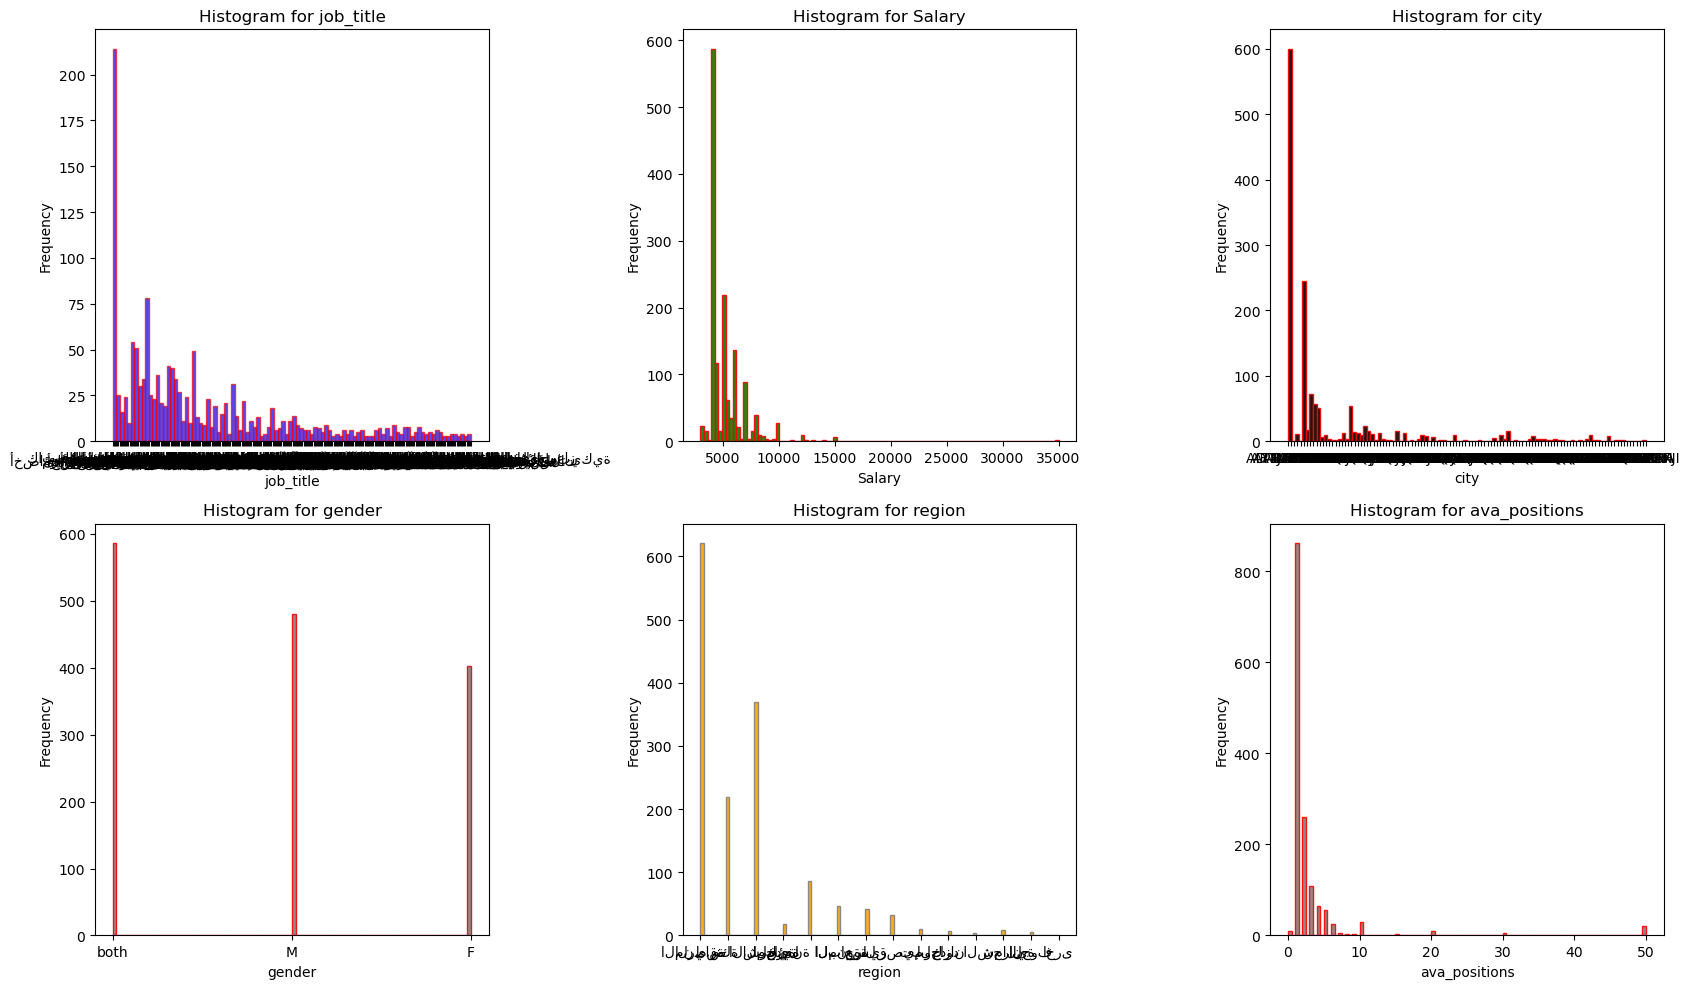

In [334]:


fig, axes = plt.subplots(2, 3, figsize=(17, 10))

axes[0, 0].hist(df["job_title"], edgecolor='red', bins=100, alpha=0.7, color='blue')
axes[0, 0].set_title('Histogram for job_title')
axes[0, 0].set_xlabel('job_title')  
axes[0, 0].set_ylabel('Frequency')  

axes[0, 1].hist(df["Salary"], edgecolor='red', bins=100, alpha=0.9, color='green')
axes[0, 1].set_title('Histogram for Salary')
axes[0, 1].set_xlabel('Salary')  
axes[0, 1].set_ylabel('Frequency')  

axes[0, 2].hist(df["city"], edgecolor='red', bins=100, alpha=0.9, color='black')
axes[0, 2].set_title('Histogram for city')
axes[0, 2].set_xlabel('city')  
axes[0, 2].set_ylabel('Frequency')  

axes[1, 0].hist(df["gender"], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1, 0].set_title('Histogram for gender')
axes[1, 0].set_xlabel('gender')  
axes[1, 0].set_ylabel('Frequency') 

axes[1, 1].hist(df["region"], edgecolor='grey', bins=100, alpha=0.9, color='orange')
axes[1, 1].set_title('Histogram for region')
axes[1, 1].set_xlabel('region')  
axes[1, 1].set_ylabel('Frequency')  

axes[1, 2].hist(df["ava_positions"], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1, 2].set_title('Histogram for ava_positions')
axes[1, 2].set_xlabel('ava_positions') 
axes[1, 2].set_ylabel('Frequency')  

plt.tight_layout()  
plt.show()


In [335]:
df[df["ava_positions"]== 50]

job_title      job_date  \
47                              بائع    25/05/1444   
303                       سائق سيارة    14/04/1444   
304                       سائق سيارة    14/04/1444   
316                       سائق سيارة    13/04/1444   
317                       سائق سيارة    13/04/1444   
319                       سائق سيارة    13/04/1444   
320                       سائق سيارة    13/04/1444   
321                       سائق سيارة    13/04/1444   
412                            قهوجي    06/04/1444   
641                       سائق سيارة    13/05/1444   
665                أخصائي خدمة عملاء    09/05/1444   
666                       سائق سيارة    09/05/1444   
676   كاتب استعلامات مركز خدمة عملاء    07/05/1444   
687   كاتب استعلامات مركز خدمة عملاء    15/05/1444   
688                أخصائي خدمة عملاء    15/05/1444   
737                         حارس أمن    19/05/1444   
846                             بائع    25/05/1444   
888                   طيار جناح ثابت  Publish date   
1064               موظف صندوق محاسبة    11/06/1444   
1132                  طيار جناح ثابت    07/06/1444   

                                               job_desc  \
47    ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
303   ['توصيل طلبات من المطاعم/المحلات التجارية عبر ...   
304   ['توصيل طلبات من المطاعم/المحلات التجارية عبر ...   
316   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
317   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
319   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
320   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
321   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
412   ['القيام بإعداد المشروبات كالقهوة و الشاي والك...   
641   ['قيادة السيارة لنقل الركاب أو البضائع والالتز...   
665   ['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...   
666   ['قيادة السيارة لنقل الركاب أو البضائع والالتز...   
676   ['قديم كل ما يلزم من مساعدة ودعم للمسافرين حسب...   
687   ['قديم كل ما يلزم من مساعدة ودعم للمسافرين حسب...   
688   ['تقديم كل ما يلزم من مساعدة ودعم للمسافرين حس...   
737   ['القيام بدوريات ومراقبة أماكن العمل لحراسة ال...   
846   ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
888   ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
1064  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1132  ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   

                                              job_tasks  \
47    ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   
303   ['توصيل عدد 360 طلب شهريا', '', 'الشروط:-', '(...   
304   ['توصيل عدد 360 طلب شهريا', '', 'الشروط:-', '(...   
316   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
317   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
319   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
320   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
321   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
412   ['   غسل الأواني و الأكواب المستخدمة، وإعدادها...   
641   ['   قيادة السيارة  لنقل الركاب أو البضائع من ...   
665   ['   إجراء الدراسات والتحاليل المتخصصة بهدف وض...   
666   ['   قيادة السيارة  لنقل الركاب أو البضائع من ...   
676   ['1. تقديم خدمات العملاء المباشرة ، بما في ذلك...   
687   ['1. تقديم خدمات العملاء المباشرة ، بما في ذلك...   
688   ['1. تقديم خدمات العملاء المباشرة ، بما في ذلك...   
737   ['   مراقبة عمليات الدخول إلى المنشأة ومغادرته...   
846   ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   
888   ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   
1064  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1132  ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   

                                           comp_name     comp_no comp_type  \
47             شركة مطعم بيت الشاورما لتقديم الوجبات   1-2239765       خاص   
303           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل  10-1996260       خاص   
304           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل  10-1996260       خاص   
316           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل  10-1996260       خاص   
317           مؤسسة اب

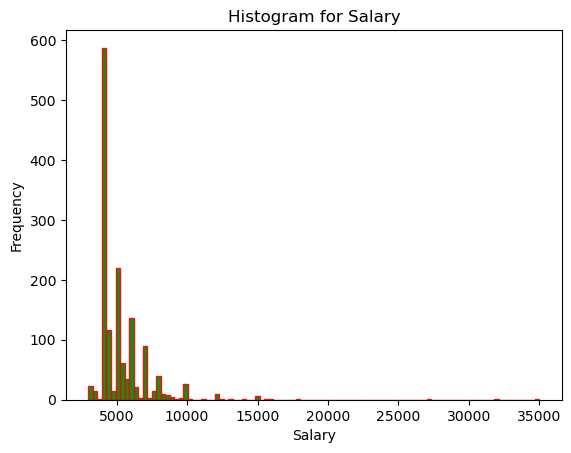

In [336]:
plt.hist(df["Salary"], edgecolor='red', bins=100, alpha=0.9, color='green')
plt.title('Histogram for Salary')
plt.xlabel('Salary')  
plt.ylabel('Frequency')  

plt.show()

In [337]:
# i think the outliers is naturals for he salary 

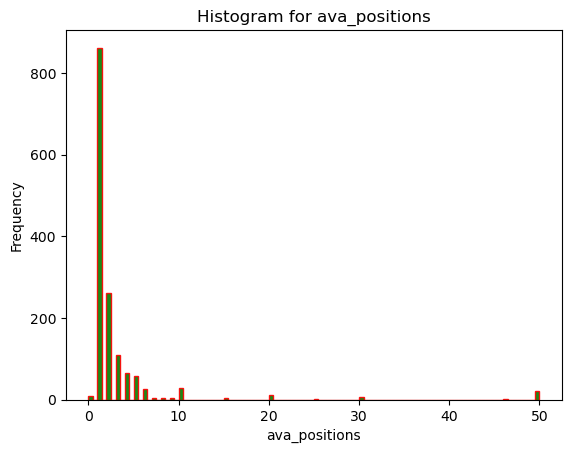

In [338]:
plt.hist(df["ava_positions"], edgecolor='red', bins=100, alpha=0.9, color='green')
plt.title('Histogram for ava_positions')
plt.xlabel('ava_positions')  
plt.ylabel('Frequency')  

plt.show()

In [339]:
# i think the outliers is naturals for he ava_positions because maybe the company need to hire a lot of people or th type 
# or th type of the business need a lot of people

In [340]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

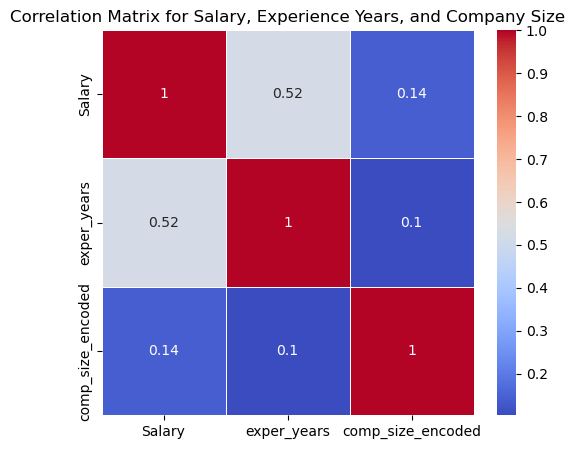

In [341]:
# Convert categorical column 'comp_size' to numerical encoding
df_show=df.copy()
df_show["comp_size_encoded"] = df["comp_size"].astype('category').cat.codes

# Selecting relevant columns for correlation matrix
correlation_columns_selected = ["Salary", "exper_years", "comp_size_encoded"]
correlation_matrix_selected = df_show[correlation_columns_selected].corr()

# Plotting the correlation heatmap for selected columns
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix_selected, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Salary, Experience Years, and Company Size")
plt.show()


In [342]:
# we notice that there is no correlation between the salary and the experience years is when the years increase the salary increase

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [343]:
df.describe(include="all").T

count unique  \
job_title        1469    324   
job_date         1469     92   
job_desc         1469    438   
job_tasks        1469    444   
comp_name        1469    886   
comp_no          1469    894   
comp_type        1469      2   
comp_size        1469      8   
eco_activity     1469    362   
qualif           1469    616   
region           1469     14   
city             1469    114   
benefits_raw     1469    393   
contract         1469      2   
positions        1469     25   
job_post_id    1469.0    NaN   
exper_years    1469.0    NaN   
gender           1469      3   
Salary         1469.0    NaN   
Benefits         1469    295   
ava_positions  1469.0    NaN   

                                                             top  freq  \
job_title                                                   بائع    98   
job_date                                              09/06/1444    47   
job_desc       ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...    93   
job_tasks      ['   بيع مجموعة من السلع والخدمات للعملاء.', '...    90   
comp_name      شركه العرض المتقن للخدمات التجارية شركة مساهمة...    16   
comp_no                                                 1-169123    16   
comp_type                                                    خاص  1464   
comp_size                                            صغيرة فئة ب   634   
eco_activity                                           غير معروف    89   
qualif                                                   Unknown   136   
region                                                    الرياض   621   
city                                                   AR RIYADH   522   
benefits_raw                                    [Salary, 4000.0]   449   
contract                                               دوام كامل  1447   
positions                                                  0 / 1   852   
job_post_id                                                  NaN   NaN   
exper_years                                                  NaN   NaN   
gender                                                      both   586   
Salary                                                       NaN   NaN   
Benefits                                                 لا يوجد  1082   
ava_positions                                                NaN   NaN   

                                mean           std               min  \
job_title                        NaN           NaN               NaN   
job_date                         NaN           NaN               NaN   
job_desc                         NaN           NaN               NaN   
job_tasks                        NaN           NaN               NaN   
comp_name                        NaN           NaN               NaN   
comp_no                          NaN           NaN               NaN   
comp_type                        NaN           NaN               NaN   
comp_size                        NaN           NaN               NaN   
eco_activity                     NaN           NaN               NaN   
qualif                           NaN           NaN               NaN   
region                           NaN           NaN               NaN   
city                             NaN           NaN               NaN   
benefits_raw                     NaN           NaN               NaN   
contract                         NaN           NaN               NaN   
positions                        NaN           NaN               NaN   
job_post_id    20202026330679.640625  58632.236705  20202026136425.0   
exper_years                 1.279782      1.879911               0.0   
gender                           NaN           NaN               NaN   
Salary                   5293.489449   2297.277246            3000.0   
Benefits                         NaN           NaN               NaN   
ava_positions                2.91627      6.405183               0.0   

                            25%               50%               75%  \
job_title                 

# Q1 What proportion of job postings is attributed to each region within the kingdom?

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83933/3142916192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reshaped_labels, y=region_counts.values, palette="viridis")


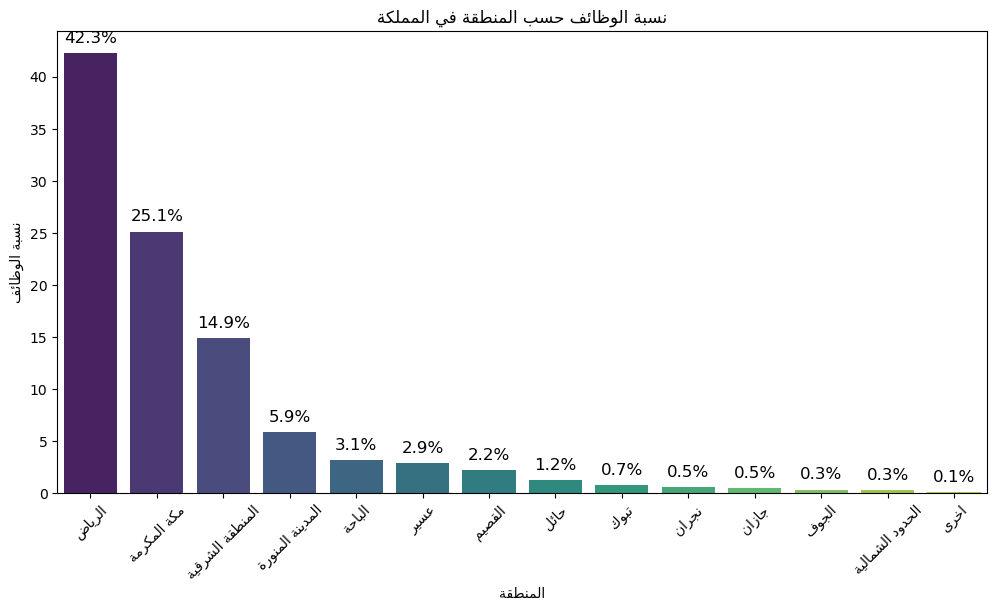

In [344]:
# Recalculate the proportion of job postings by region
region_counts = df["region"].value_counts(normalize=True) * 100
# Reshape and display Arabic text correctly
reshaped_labels = [get_display(arabic_reshaper.reshape(region)) for region in region_counts.index]

# Plotting a Bar Chart with Proper Arabic Text Rendering
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=reshaped_labels, y=region_counts.values, palette="viridis")

# Adding percentage labels on top of the bars
for i, value in enumerate(region_counts.values):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

plt.title(get_display(arabic_reshaper.reshape("نسبة الوظائف حسب المنطقة في المملكة")))
plt.xlabel(get_display(arabic_reshaper.reshape("المنطقة")))
plt.ylabel(get_display(arabic_reshaper.reshape("نسبة الوظائف")))
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

In [345]:
# we can see that riaydh has the most job postings because it is the capital of the saudi arabia
# and riyadh has the most population in saudi arabia and vision 2030 has a lot of projects in riyadh
# Smaller cities may have niche job opportunities, but job seekers may need to relocate to larger cities for better prospects.


# Q2 Is there a gender preference indicated in the job postings?

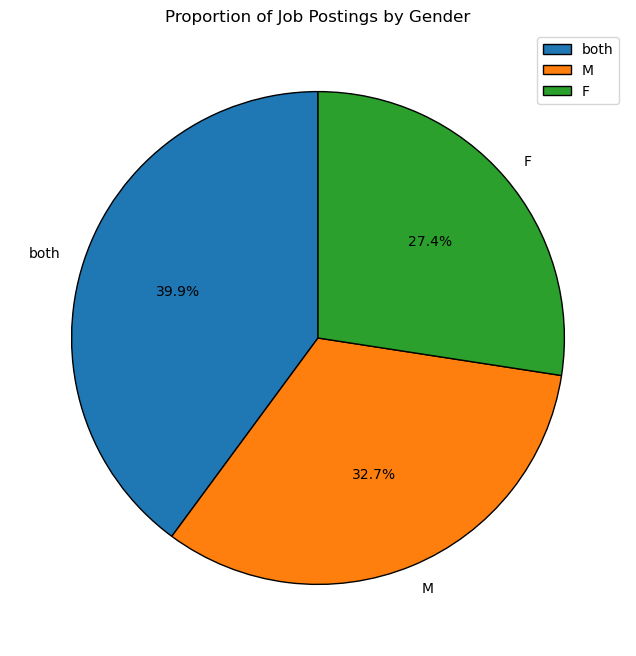

In [346]:
# Gender distribution as a Pie Chart with Better Colors
plt.figure(figsize=(8, 8))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green for distinction

df["gender"].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    legend=True, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Proportion of Job Postings by Gender")
plt.ylabel("")  # Remove default ylabel for better readability
plt.show()


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83933/305500220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="gender", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])


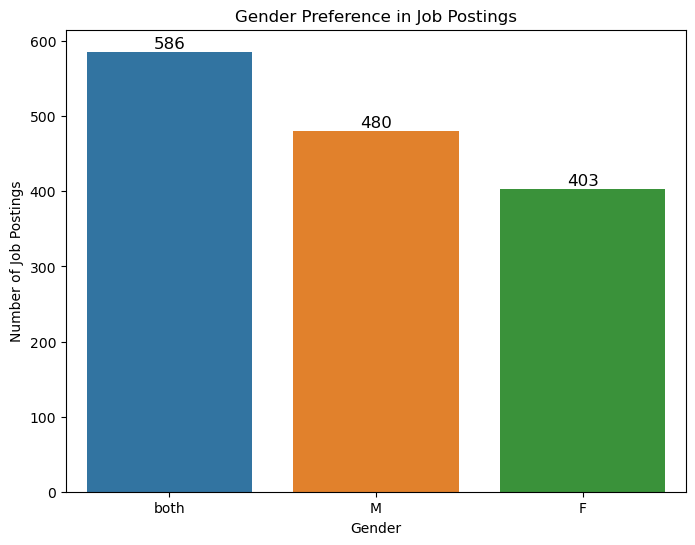

In [347]:
# Improved Bar Chart for Gender Preference in Job Postings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="gender", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])

# Add count labels on top of bars
for i, value in enumerate(df["gender"].value_counts()):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

plt.title("Gender Preference in Job Postings")
plt.xlabel("Gender")
plt.ylabel("Number of Job Postings")
plt.show()


In [348]:
# we can see that most of jobs can female or male do it 
# and maybe the male more than the female in the job market because 
# Some industries or job roles may have gender preferences
# due to physical requirements or company policies.

# Q3 What is the expected salary range for fresh graduates?


In [349]:
# Filtering data for fresh graduates (0 years experience)
fresh_graduates_df = df[df["exper_years"] == 0]

# Checking salary range for fresh graduates
print(f"the average salary for fresh graduates is {fresh_graduates_df['Salary'].mean()}")
print(f"the median salary for fresh graduates is {fresh_graduates_df['Salary'].median()}")
print(f"the mode salary for fresh graduates is {fresh_graduates_df['Salary'].mode()}")
print( f"Expected Salary Range for Fresh Graduates: {fresh_graduates_df['Salary'].min():.2f} - {fresh_graduates_df['Salary'].max():.2f} SAR")


# # Plotting a boxplot for fresh graduates' salaries
# plt.figure(figsize=(8, 5))
# sns.boxplot(data=fresh_graduates_df, y="Salary", color="#1f77b4")
# plt.title("Salary Distribution for Fresh Graduates")
# plt.ylabel("Salary (SAR)")
# plt.show()


the average salary for fresh graduates is 4709.486778846154
the median salary for fresh graduates is 4000.0
the mode salary for fresh graduates is 0    4000.0
Name: Salary, dtype: float64
Expected Salary Range for Fresh Graduates: 3000.00 - 12325.00 SAR


In [350]:
# we can see that the most common salary is 4000 maybe because it is the minimum wage in Saudi Arabia for companies

# Q4 Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

In [351]:
# Grouping experience levels for better visualization
df["experience_group"] = df["exper_years"].apply(lambda x: "Fresh Graduates" if x == 0 
                                                 else "1-3 Years" if x <= 3 
                                                 else "4+ Years")

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83933/3163119840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_group_counts.index, y=experience_group_counts.values, palette="viridis")


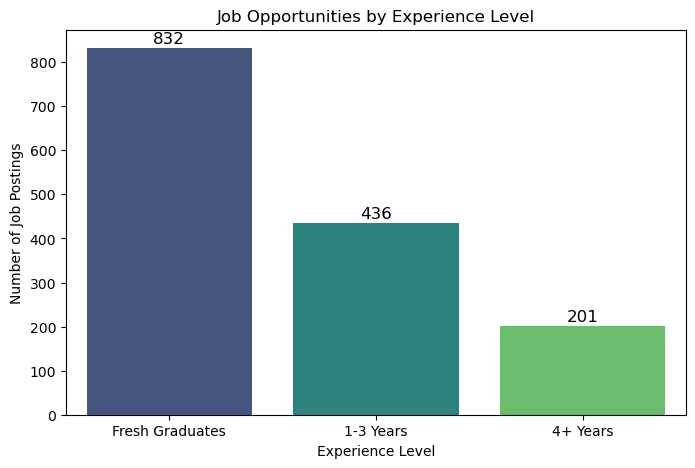

In [352]:


# Count job postings by experience group
experience_group_counts = df["experience_group"].value_counts()

# Plotting the optimized bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=experience_group_counts.index, y=experience_group_counts.values, palette="viridis")

# Adding count labels on top of bars
for i, value in enumerate(experience_group_counts.values):
    plt.text(i, value + 10, str(value), ha='center', fontsize=12)

plt.title("Job Opportunities by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Number of Job Postings")
plt.show()




In [353]:
# we can see that fresh graduates have the highest number of job opportunities so that mean the market 
# The number of job opportunities decreases as experience increases.
# maybe the market need more fresh graduates because they excited to do what they learn in the university

In [354]:
# df.to_csv("Data/Jadarat_data_cleaned.csv", index=False)


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83933/3089273573.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y=region_salary_filtered['region'], data=region_salary_filtered, palette='viridis')


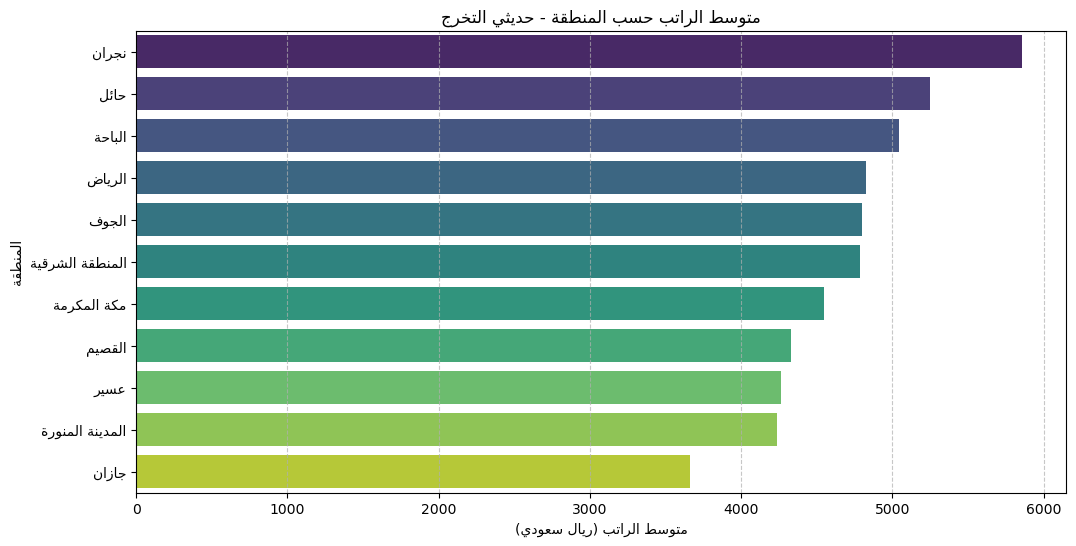

In [380]:
# Filter data for fresh graduates
fresh_grads_df = df[df['experience_group'] == 'Fresh Graduates']

# Apply Arabic reshaping and Bidi algorithm without directly modifying the column
reshaped_regions = fresh_grads_df['region'].astype(str).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Group by reshaped regions and calculate the average salary and count
region_salary_count = fresh_grads_df.groupby(reshaped_regions)['Salary'].agg(['mean', 'count']).reset_index()

# Filter regions with more than 2 fresh graduate job listings
region_salary_filtered = region_salary_count[region_salary_count['count'] >3]

# Sort values for better visualization
region_salary_filtered = region_salary_filtered.sort_values(by='mean', ascending=False)

# Plot the average salary by region for fresh graduates (filtered)
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y=region_salary_filtered['region'], data=region_salary_filtered, palette='viridis')

plt.xlabel(get_display(arabic_reshaper.reshape("متوسط الراتب (ريال سعودي)")))
plt.ylabel(get_display(arabic_reshaper.reshape("المنطقة")))
plt.title(get_display(arabic_reshaper.reshape("متوسط الراتب حسب المنطقة - حديثي التخرج")))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [373]:
df[(df["region"]=="الرياض") & (df["experience_group"]=="Fresh Graduates")]["Salary"].max()

12325.0